In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [58]:
df = pd.read_csv('cs-training.csv')

In [59]:
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
ID                                      150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [61]:
df.shape

(150000, 12)

In [62]:
df = df.drop(df.columns[[0,4,8,10]],axis=1)

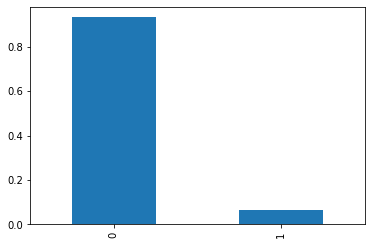

In [63]:
df['SeriousDlqin2yrs'].value_counts(normalize=True).plot.bar()

# Monthly Income

In [64]:
df['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

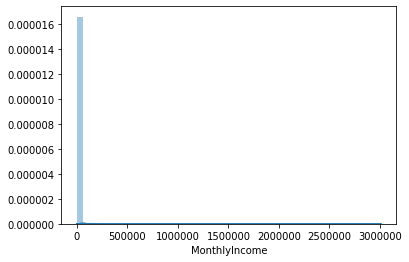

In [65]:
sns.distplot(df['MonthlyIncome'].dropna())
plt.show()

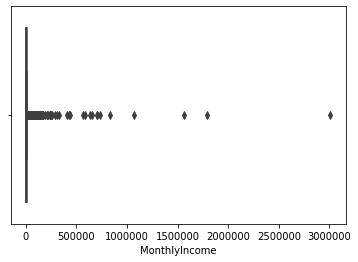

In [66]:
sns.boxplot(df['MonthlyIncome'])

In [67]:
df.loc[df['MonthlyIncome']>15500, 'MonthlyIncome'] = 15500

In [68]:
df.loc[df['MonthlyIncome']<1000, 'MonthlyIncome'] = np.NaN

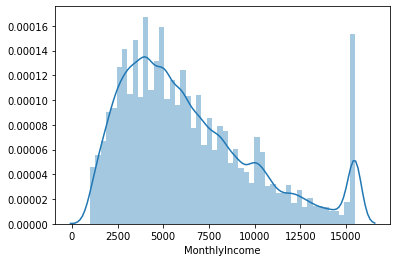

In [69]:
sns.distplot(df['MonthlyIncome'].dropna())
plt.show()

In [70]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(method='ffill')

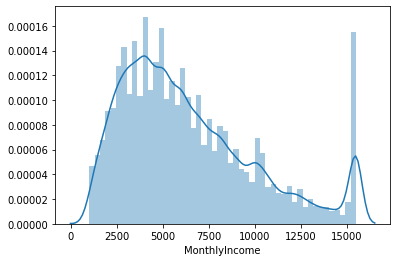

In [71]:
sns.distplot(df['MonthlyIncome'])
plt.show()

# RevolvingUtilization of Unsecured Credit Lines

In [72]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [73]:
df.loc[df['RevolvingUtilizationOfUnsecuredLines']>1,'RevolvingUtilizationOfUnsecuredLines'] = np.NaN

RevolvingUtilizationOfUnsecuredLines more than 1 is not possible (such cases are not outliers).hence we made such cases missing and  imputed

In [74]:
df['RevolvingUtilizationOfUnsecuredLines'] = df['RevolvingUtilizationOfUnsecuredLines'].fillna(method='ffill')

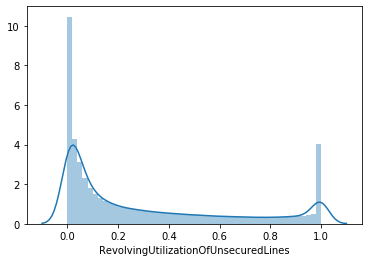

In [75]:
sns.distplot(df['RevolvingUtilizationOfUnsecuredLines'])
plt.show()

# Age

In [76]:
df['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [77]:
df.loc[((df['age']>80)|(df['age']<18)),'age'] = np.NaN

In [78]:
df['age'].describe()

count    145063.000000
mean         51.171663
std          13.665503
min          21.000000
25%          41.000000
50%          51.000000
75%          62.000000
max          80.000000
Name: age, dtype: float64

In [79]:
df['age'] = df['age'].fillna(method='ffill')

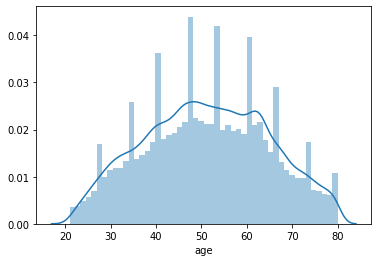

In [80]:
sns.distplot(df['age'])
plt.show()

# Debt Ratio

In [81]:
df['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [82]:
df.loc[df['DebtRatio']>1, 'DebtRatio'] = np.NaN

In [83]:
df['DebtRatio'] = df['DebtRatio'].fillna(method='ffill')

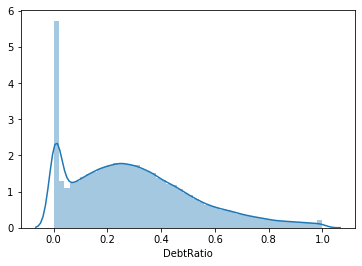

In [84]:
sns.distplot(df['DebtRatio'])

# Number of Dependents

In [85]:
df['NumberOfDependents'].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [86]:
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(method='ffill')

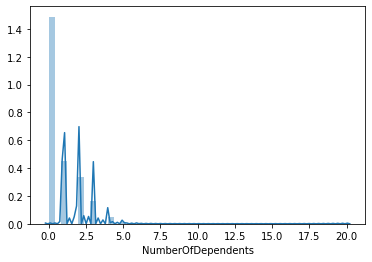

In [87]:
sns.distplot(df['NumberOfDependents'])

In [88]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,0.303669,51.170047,0.303109,6376.857593,8.452760,1.018240,0.757247
std,0.249746,0.337852,13.667271,0.226290,3642.648085,5.145951,1.129771,1.115278
min,0.000000,0.000000,21.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,0.000000,0.028578,41.000000,0.126122,3600.000000,5.000000,0.000000,0.000000
50%,0.000000,0.144257,51.000000,0.274252,5500.000000,8.000000,1.000000,0.000000
75%,0.000000,0.520104,62.000000,0.438325,8333.000000,11.000000,2.000000,1.000000
max,1.000000,1.000000,80.000000,1.000000,15500.000000,58.000000,54.000000,20.000000


# EDA

# Deliquency and Monthly Income

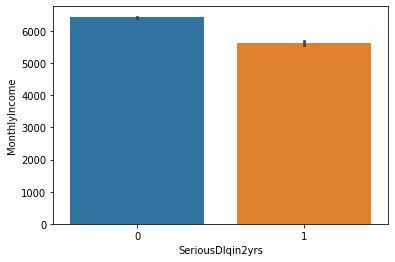

In [89]:
sns.barplot(x='SeriousDlqin2yrs',y = 'MonthlyIncome', data=df)
plt.show()

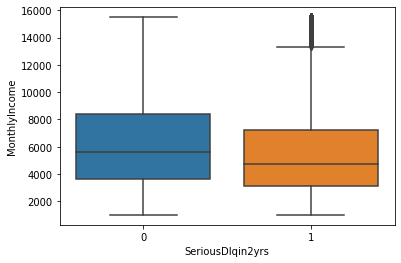

In [90]:
sns.boxplot(x='SeriousDlqin2yrs',y='MonthlyIncome',data=df)

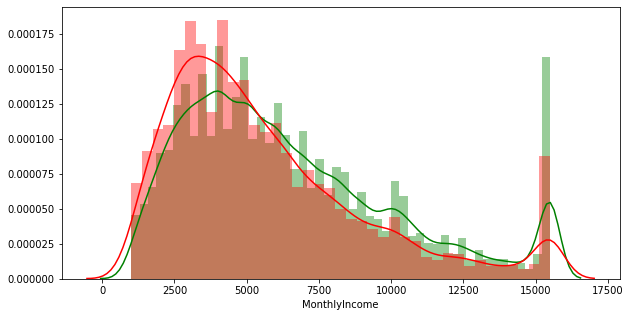

In [91]:
mi0 = df[df['SeriousDlqin2yrs']==0]
mi1 = df[df['SeriousDlqin2yrs']==1]

plt.figure(figsize=(10,5))
sns.distplot(mi0['MonthlyIncome'],color='g')
sns.distplot(mi1['MonthlyIncome'],color='r')
plt.show()

In [92]:
q1 = df['MonthlyIncome'].quantile(0.25)
q2 = df['MonthlyIncome'].quantile(0.50)
q3 = df['MonthlyIncome'].quantile(0.75)

def mi_cat(mi):
    if mi<= q1:
        return 1
    elif q1<mi<=q2:
        return 2
    elif q2<mi<=q3:
        return 3
    else:
        return 4

In [93]:
df['mi_cat'] = df['MonthlyIncome'].apply(mi_cat)

In [94]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,mi_cat
0,1,0.766127,45.0,0.802982,9120.0,13,6,2.0,4
1,0,0.957151,40.0,0.121876,2600.0,4,0,1.0,1
2,0,0.658180,38.0,0.085113,3042.0,2,0,0.0,1
3,0,0.233810,30.0,0.036050,3300.0,5,0,0.0,1
4,0,0.907239,49.0,0.024926,15500.0,7,1,0.0,4


In [95]:
df.groupby('mi_cat')['MonthlyIncome'].agg(['min','max'])               #to check categorising is correct or no

,min,max
mi_cat,,
1,1000.0,3600.0
2,3601.0,5500.0
3,5501.0,8333.0
4,8334.0,15500.0


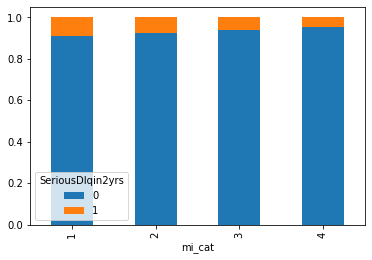

In [96]:
ct = pd.crosstab(df['SeriousDlqin2yrs'], df['mi_cat'], normalize='columns').T
ct.plot.bar(stacked=True)
plt.show()

the chart shows that default rate is approimately same for the highest two categories of income.
default rate is highest  for the lowest income category.

# Deliquency and RevolvingUtilizationOfUnsecuredLines

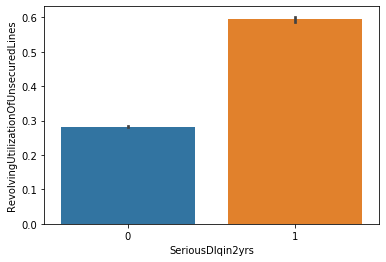

In [97]:
sns.barplot(x='SeriousDlqin2yrs',y = 'RevolvingUtilizationOfUnsecuredLines', data=df)
plt.show()

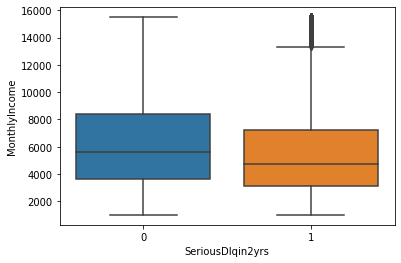

In [98]:
sns.boxplot(x='SeriousDlqin2yrs',y='MonthlyIncome',data=df)

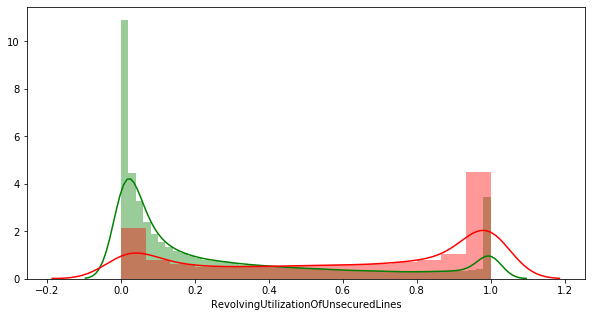

In [99]:
mi0 = df[df['SeriousDlqin2yrs']==0]
mi1 = df[df['SeriousDlqin2yrs']==1]

plt.figure(figsize=(10,5))
sns.distplot(mi0['RevolvingUtilizationOfUnsecuredLines'],color='g')
sns.distplot(mi1['RevolvingUtilizationOfUnsecuredLines'],color='r')
plt.show()

In [100]:
q1 = df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.25)
q2 = df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.50)
q3 = df['RevolvingUtilizationOfUnsecuredLines'].quantile(0.75)

def ruul_cat(mi):
    if mi<= q1:
        return 1
    elif q1<mi<=q2:
        return 2
    elif q2<mi<=q3:
        return 3
    else:
        return 4

In [101]:
df['ruul_cat'] = df['RevolvingUtilizationOfUnsecuredLines'].apply(ruul_cat)

In [102]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,mi_cat,ruul_cat
0,1,0.766127,45.0,0.802982,9120.0,13,6,2.0,4,4
1,0,0.957151,40.0,0.121876,2600.0,4,0,1.0,1,4
2,0,0.658180,38.0,0.085113,3042.0,2,0,0.0,1,4
3,0,0.233810,30.0,0.036050,3300.0,5,0,0.0,1,3
4,0,0.907239,49.0,0.024926,15500.0,7,1,0.0,4,4


In [103]:
df.groupby('ruul_cat')['RevolvingUtilizationOfUnsecuredLines'].agg(['min','max'])               #to check categorising is correct or no

,min,max
ruul_cat,,
1,0.000000,0.028576
2,0.028579,0.144257
3,0.144257,0.520099
4,0.520122,1.000000


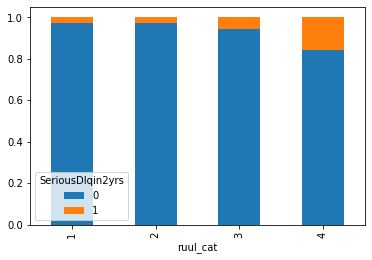

In [104]:
ct = pd.crosstab(df['SeriousDlqin2yrs'], df['ruul_cat'], normalize='columns').T
ct.plot.bar(stacked=True)
plt.show()

The chart shows that first two categories for ruul is approximately same as far as deliquency is concerned.
Delinquency of the 4th category (ruul>0.52) is the highest

# Visualization using Decision Tree

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null float64
DebtRatio                               150000 non-null float64
MonthlyIncome                           150000 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfDependents                      150000 non-null float64
mi_cat                                  150000 non-null int64
ruul_cat                                150000 non-null int64
dtypes: float64(5), int64(5)
memory usage: 11.4 MB


In [106]:
y = df['SeriousDlqin2yrs']

X = df.drop(['SeriousDlqin2yrs','mi_cat','ruul_cat'],axis=1)

In [107]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1, max_depth=5, max_leaf_nodes=10)

dtc.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [108]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [109]:
sudo apt-get install -y graphviz libgraphviz-dev

SyntaxError: invalid syntax (<ipython-input-109-e0578db3b203>, line 1)

In [ ]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus


dot_data = export_graphviz(dtc, out_file=None, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Model Building- Statistics

In [110]:
df1 = df.copy()
df1 = df.drop(['mi_cat','ruul_cat'],axis=1)

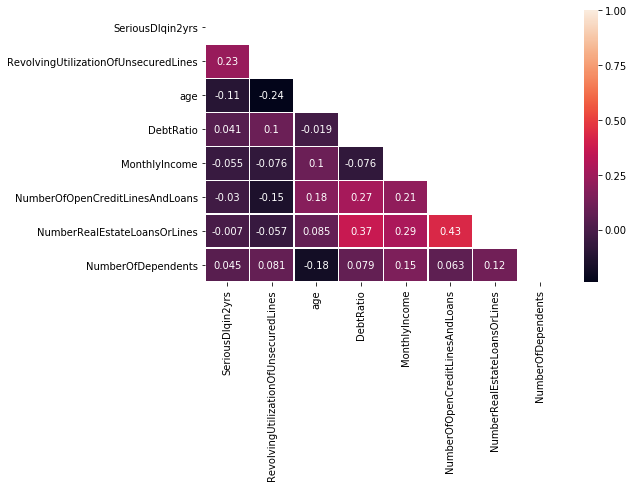

In [111]:
plt.figure(figsize=(8,5))
corr = df1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr, mask=mask, linewidth=0.5, annot=True)
plt.show()

C:\Users\krishna\New folder\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\krishna\New folder\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


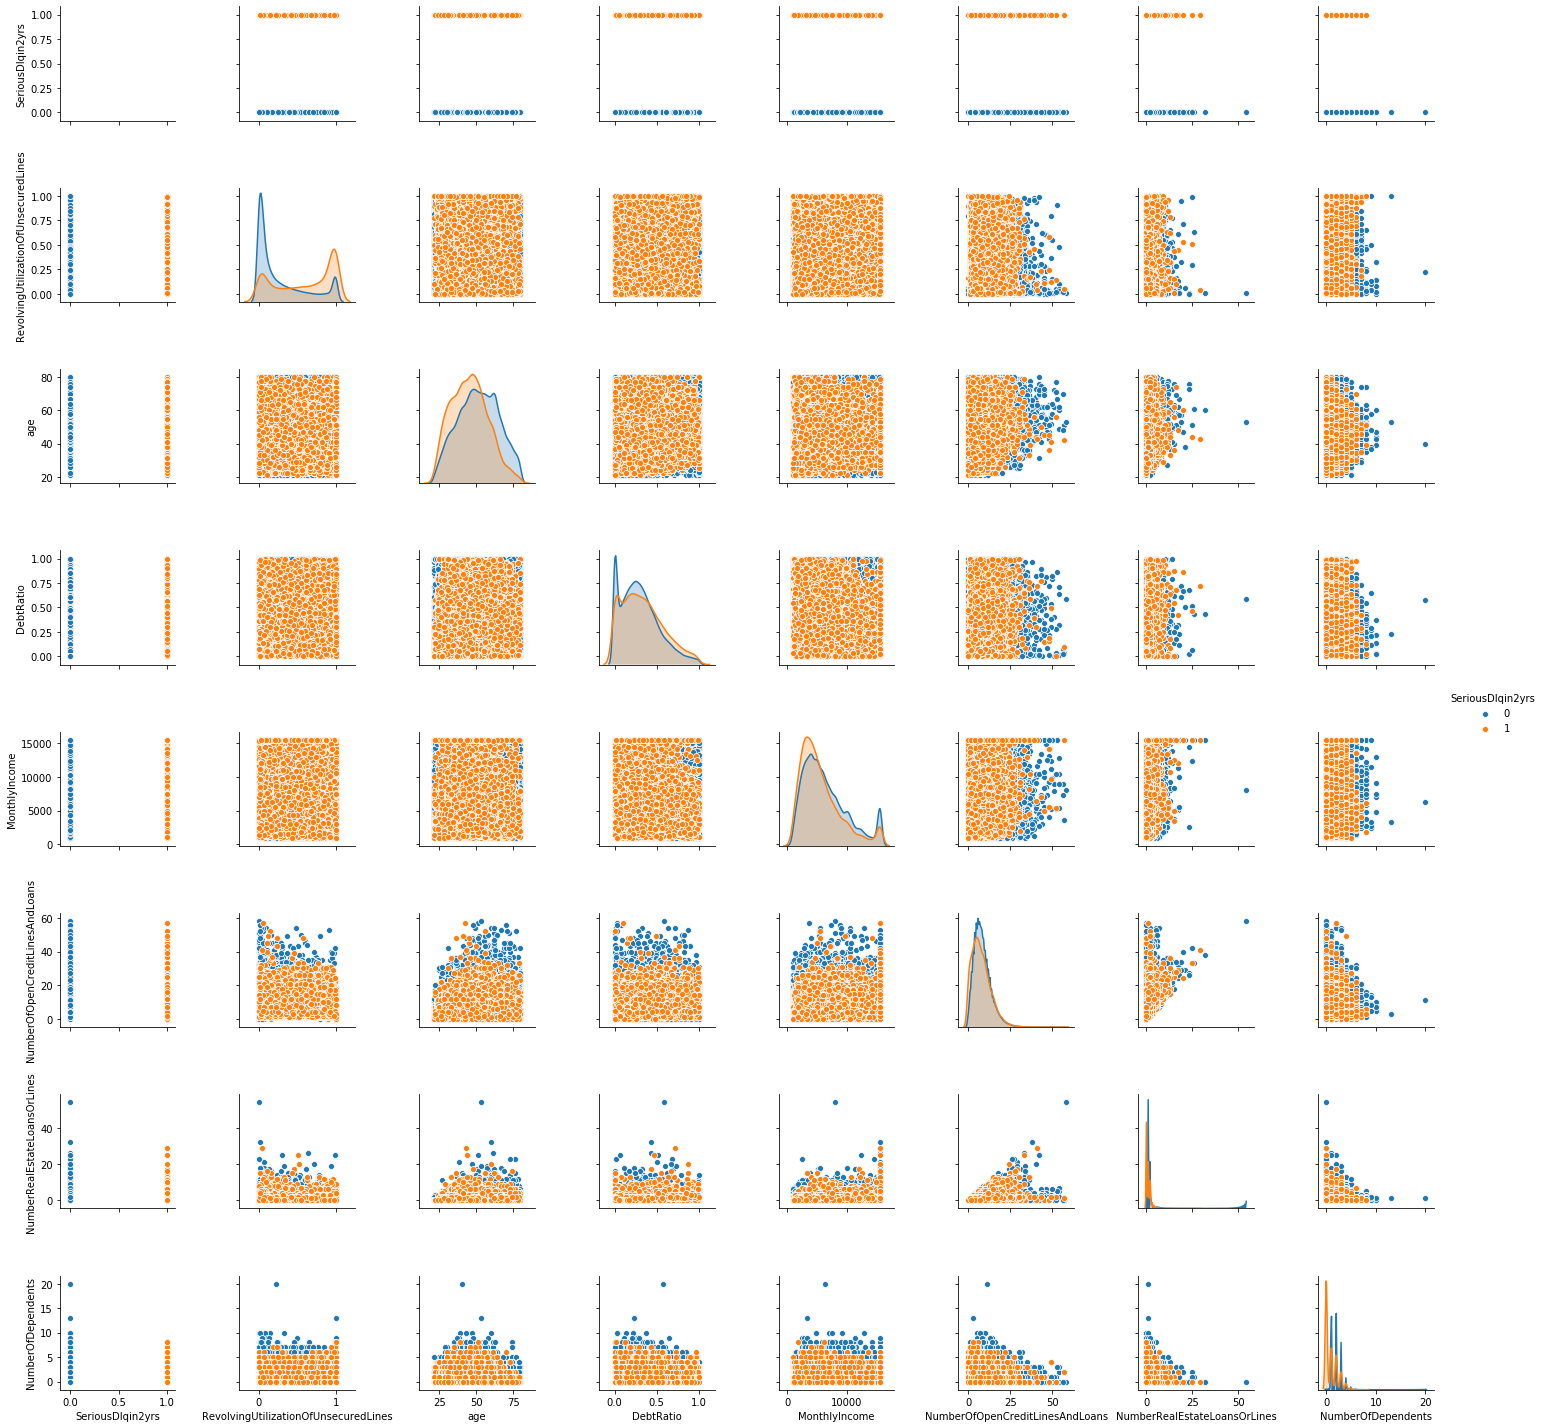

In [112]:
sns.pairplot(df1, hue='SeriousDlqin2yrs')
plt.show()

In [113]:
y = df['SeriousDlqin2yrs']
X = df.drop(['SeriousDlqin2yrs','mi_cat','ruul_cat'],axis=1)

X = X.assign(const=1)

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

pd.DataFrame({'vif':vif}, index=X.columns)

,vif
RevolvingUtilizationOfUnsecuredLines,1.098568
age,1.132475
DebtRatio,1.278075
MonthlyIncome,1.186726
NumberOfOpenCreditLinesAndLoans,1.332094
NumberRealEstateLoansOrLines,1.470203
NumberOfDependents,1.082617
const,23.868246


In [115]:
import statsmodels.api as sm
logit = sm.Logit(y,X).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.218678
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               150000
Model:                          Logit   Df Residuals:                   149992
Method:                           MLE   Df Model:                            7
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:                  0.1088
Time:                        12:09:52   Log-Likelihood:                -32802.
converged:                       True   LL-Null:                       -36808.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
RevolvingUtilizationOfUnsecuredLines     2.2049      0.031     72.104      0.000       2.145       2.265
age                                     -0.0200      0.001    -22.703      0.000      -0.022      -0.018
DebtRatio                                0.2202      0.050      4.368      0.000       0.121       0.319
MonthlyIncome                        -5.208e-05    3.5e-06    -14.892      0.000   -5.89e-05   -4.52e-05
NumberOfOpenCreditLinesAndLoans          0.0226      0.002      9.289      0.000       0.018       0.027
NumberRealEstateLoansOrLines             0.0580      0.010      5.530      0.000       0.037       0.079
NumberOfDependents                       0.0860      0.009      9.552      0.000       0.068       0.104
const                                   -2.6993      0.052    -52.350      0.000      -2.800      -2.598
========================================================================================================
"""

-. all coef are significant
1. chek sign
    -as Age increses delingnency decreses
    -as DebtRatio increses delignency increases
    
2. Log of odds
    -as Age increses by 1yr Log(odds) of Delignency decreases by 0.02
    -as NoD increases by 1 Log(odds)of Delignency decreases by 0.086
    
3.Exponential of coefts
    - as Age increases by 1 yr odds of delignency decreases by 2%
    - as NoD increases by 1 odds of delignency increases by 8%

In [116]:
np.exp(logit.params)            

RevolvingUtilizationOfUnsecuredLines    9.069594
age                                     0.980240
DebtRatio                               1.246357
MonthlyIncome                           0.999948
NumberOfOpenCreditLinesAndLoans         1.022867
NumberRealEstateLoansOrLines            1.059728
NumberOfDependents                      1.089813
const                                   0.067251
dtype: float64

In [117]:
y = df['SeriousDlqin2yrs']
X = df.drop(['SeriousDlqin2yrs','mi_cat','ruul_cat'],axis=1)
X = X.assign(const=1)

X['DebtRatio'] = X['DebtRatio']*100
X['MonthlyIncome'] = X['MonthlyIncome']/1000

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

pd.DataFrame({'vif':vif}, index=X.columns)

,vif
RevolvingUtilizationOfUnsecuredLines,1.098568
age,1.132475
DebtRatio,1.278075
MonthlyIncome,1.186726
NumberOfOpenCreditLinesAndLoans,1.332094
NumberRealEstateLoansOrLines,1.470203
NumberOfDependents,1.082617
const,23.868246


In [119]:
import statsmodels.api as sm
logit = sm.Logit(y,X).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.218678
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               150000
Model:                          Logit   Df Residuals:                   149992
Method:                           MLE   Df Model:                            7
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:                  0.1088
Time:                        12:09:55   Log-Likelihood:                -32802.
converged:                       True   LL-Null:                       -36808.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
RevolvingUtilizationOfUnsecuredLines     2.2049      0.031     72.104      0.000       2.145       2.265
age                                     -0.0200      0.001    -22.703      0.000      -0.022      -0.018
DebtRatio                                0.0022      0.001      4.368      0.000       0.001       0.003
MonthlyIncome                           -0.0521      0.003    -14.892      0.000      -0.059      -0.045
NumberOfOpenCreditLinesAndLoans          0.0226      0.002      9.289      0.000       0.018       0.027
NumberRealEstateLoansOrLines             0.0580      0.010      5.530      0.000       0.037       0.079
NumberOfDependents                       0.0860      0.009      9.552      0.000       0.068       0.104
const                                   -2.6993      0.052    -52.350      0.000      -2.800      -2.598
========================================================================================================
"""

In [120]:
np.exp(logit.params)            

RevolvingUtilizationOfUnsecuredLines    9.069594
age                                     0.980240
DebtRatio                               1.002205
MonthlyIncome                           0.949257
NumberOfOpenCreditLinesAndLoans         1.022867
NumberRealEstateLoansOrLines            1.059728
NumberOfDependents                      1.089813
const                                   0.067251
dtype: float64

In [121]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

In [125]:
y_prob = logit.predict(X)
y_pred = y_prob.apply(lambda x: 0 if x<0.5 else 1)

In [126]:
y_pred.value_counts()

0    149998
1         2
dtype: int64

In [127]:
print(confusion_matrix(y,y_pred))

[[139972      2]
 [ 10026      0]]


In [128]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97    139974
           1       0.00      0.00      0.00     10026

    accuracy                           0.93    150000
   macro avg       0.47      0.50      0.48    150000
weighted avg       0.87      0.93      0.90    150000



# ROC Analysis

In [135]:
roc_auc_score(y,y_prob)

0.7540753689342512

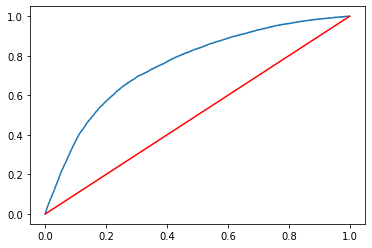

In [136]:
fpr, tpr, thresh = roc_curve(y, y_prob)

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, '-r')
plt.show()

In [137]:
thresh[0] = thresh[0]-1
diff = tpr-fpr

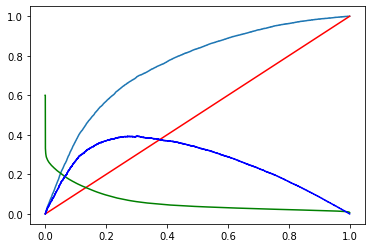

In [138]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, '-r')
plt.plot(fpr, thresh, '-g')
plt.plot(fpr,diff, '-b')
plt.show()

# Machine Learning-Classifier

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

In [150]:
from sklearn.metrics import accuracy_score

In [145]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=1)

rfc.fit(X_train, y_train)

y_train_prob = rfc.predict_proba(X_train)[:,1]
y_test_prob = rfc.predict_proba(X_test)[:,1]

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

print('Accuracy score of train: ', accuracy_score(y_train, y_train_pred))
print('Accuracy score of test: ', accuracy_score(y_test, y_test_pred))

print('AUC of train: ', roc_auc_score(y_train, y_train_prob))
print('AUC of test: ', roc_auc_score(y_test, y_test_prob))

Accuracy score of train:  0.987
Accuracy score of test:  0.9301555555555555
AUC of train:  0.999577453434209
AUC of test:  0.6599604446221206


## HYPERPARAMETER TUNING

In [151]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state=1)

param_dist = {
    'n_estimators': sp_randint(5,100),
    'max_depth': sp_randint(2,50),
    'min_samples_split': sp_randint(2,100),
    'min_samples_leaf': sp_randint(2,10)}

rand_search = RandomizedSearchCV(rfc, param_distributions=param_dist, cv=3, random_state=1)

rand_search.fit(X,y)

print(rand_search.best_params_)

{'max_depth': 11, 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 84}


In [152]:
rfc = RandomForestClassifier(**rand_search.best_params_, random_state=1)

rfc.fit(X_train, y_train)

y_train_prob = rfc.predict_proba(X_train)[:,1]
y_test_prob = rfc.predict_proba(X_test)[:,1]

y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

print('Accuracy score of train: ', accuracy_score(y_train, y_train_pred))
print('Accuracy score of test: ', accuracy_score(y_test, y_test_pred))

print('AUC of train: ', roc_auc_score(y_train, y_train_prob))
print('AUC of test: ', roc_auc_score(y_test, y_test_prob))

Accuracy score of train:  0.933047619047619
Accuracy score of test:  0.9336
AUC of train:  0.8457424480564371
AUC of test:  0.7672897985352818


In [158]:
#Simulation to Estimate Optimal cutoff

model_gain = []
thresholds = []

y_prob = pd.DataFrame(y_test_prob)

max_p = y_prob.max()[0]

for i in np.linspace(0, max_p, 100):
    y_pred = y_prob[0].apply(lambda x:1 if x>i else 0)
    conf = confusion_matrix(y_test, y_pred)
    
    tot_benefit = (conf[0][0]*1000 + conf[0][1]*-1000)
    tot_cost = conf[1][0]*15000
    net_gain = tot_benefit - tot_cost
    model_gain.append(net_gain)
    thresholds.append(i)
    
print('Max net gain', max(model_gain))

Max net gain 7191000


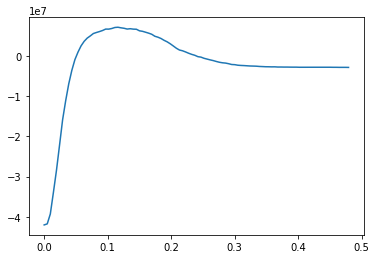

In [159]:
plt.plot(thresholds, model_gain)
plt.show()

In [160]:
optimal_idx = np.argmax(model_gain)
optimal_threshold = thresholds[optimal_idx]
print('optimal threshold: ', optimal_threshold)

optimal threshold:  0.11619945614244198


## Scoring Loan Applications

In [212]:
dfs = pd.read_csv('gsmc_to_score.csv')
dfs.head()

,Unnamed: 0,ID,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,0,38250,0.689749,38,0.650818,4584.0,13,2,0.0
1,1,13403,1.043621,32,0.025321,5765.0,3,0,1.0
2,2,8615,0.456954,48,0.580222,6400.0,7,2,1.0
3,3,21200,0.368844,52,0.078662,9775.0,8,0,0.0
4,4,100806,0.505278,62,0.414859,6500.0,23,0,2.0


In [213]:
ID = dfs[['ID']]

In [214]:
dfs = dfs.drop(['Unnamed: 0','ID'],axis=1)

In [215]:
dfs.loc[dfs['MonthlyIncome']>15500,'MonthlyIncome'] = 15500
dfs.loc[dfs['MonthlyIncome']<1000,'MonthlyIncome'] = np.NaN
dfs['MonthlyIncome'] = dfs['MonthlyIncome'].fillna(method='ffill')
dfs.loc[dfs['RevolvingUtilizationOfUnsecuredLines']>1,'RevolvingUtilizationOfUnsecuredLines'] = np.NaN

dfs['RevolvingUtilizationOfUnsecuredLines'] =dfs['RevolvingUtilizationOfUnsecuredLines'].fillna(method='ffill')
dfs.loc[((dfs['age']>80) | (dfs['age']<18)),'age'] = np.NaN
dfs['age']=dfs['age'].fillna(method='ffill')



dfs.loc[dfs['DebtRatio']>1,'DebtRatio'] = np.NaN
dfs['DebtRatio'] = dfs['DebtRatio'].fillna(method='ffill')
dfs['NumberOfDependents'] = dfs['NumberOfDependents'].fillna(method='ffill')

dfs = dfs.assign(const=1)

In [216]:
y_prob_score = rfc.predict_proba(dfs)[:,1]
id['prob'] = y_prob_score

In [217]:
id.head()

,ID,prob
0,38250,0.156185
1,13403,0.156713
2,8615,0.065253
3,21200,0.071183
4,100806,0.075875


In [218]:
id['approve_reject'] = id['prob'].apply(lambda x:'approve' if x<optimal_threshold else 'reject')

In [220]:
id.head()

,ID,prob,approve_reject
0,38250,0.156185,reject
1,13403,0.156713,reject
2,8615,0.065253,approve
3,21200,0.071183,approve
4,100806,0.075875,approve


## Feature Engineering to Improve Model Input